# Curso: CC521 A Programación Evolutiva 2022-1
Alumno: Jordi Joel Bardales Rojas

## Práctica dirigida: Operadores de Mutación


### Problema 1

Dada la cadena de longitud 27

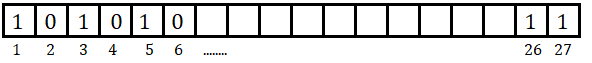

Sea $i$ la posición del gen en la cadena, entonces la probabilidad de posicionarse en el gen $k$ es $1/27$, es decir:

$i \sim \text{uniforme}\{\mathbb{1}, \mathbb{27}\}$

$P(i=k) = \frac{1}{27}$

Además, sea $X_i$ el valor del bit ($0$ o $1$), la probabilidad de que estando en el gen $i$, el bit $X_i$ cambie tiene probabilidad $1$, es decir, una vez posicionado en $i$ este siempre cambia.

$P(X_i \text{ cambia}) = 1$

Por lo tanto, la probabilidad de que el gen $k=17$ cambie por mutación es:

\begin{align*}
P(X_i \text{ cambia}, i=k) &= P(X_i \text{ cambia} | i=k)P(i=k)\\
&= P(X_k \text{ cambia})P(i=k)\\
&=1\times \frac{1}{27} = \frac{1}{27}
\end{align*}

*Respuesta a)*


### Problema 2

La representación más adecuada es una cadena de $n$ valores binarios debido a que un interruptor unicamente puede estar en dos estados, encendido y apagado, encendido tomaría el valor de  $1$ y apagado el valor de $0$, por lo que en el problema de minimización utilizando algoritmos genéticos, se buscaría alguna configuración de $0$'s y $1$'s tal que minimize las fluctuaciones.  Por ejemplo, la cadena $[1, 0, 1, 0]$, seria la configuración ENCENDIDO, APAGADO, ENCENDIDO, APAGADO.

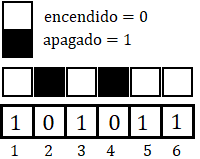

*Respuesta a)*


### Problema 3

En una operación el orden y la unicidad en las operaciones es importante, con un cruce de dos puntos, se generaria elementos repetidos. Por ejemplo se tiene el siguiente conjunto de operaciones para el corazon:

1. Realizar anastesia
2. Conectar respirador
3. Limpiar la zona
4. Realizar incision con el bisturí
5. Curar el corazón
6. Coser la la zona abierta
7. Dar de alta al paciente

Sea el individuo una permutacion del $1$ al $7$
```
p1 = [2, 3, | 4, 7, 6,| 1, 5]
p2 = [7, 6, | 1, 4, 2,| 3, 5]
c1 = [7, 6, | 4, 7, 6,| 3, 5]
c2 = [2, 3, | 1, 4, 2,| 1, 5]
```
Se observa como hay dos 7 y 6 en el hijo $c_1$ y dos 2 y 1 en el hijo $c_2$, además se perdieron dos operaciones en cada hijo. Por ese motivo no es adecuado trabajar con cruces de dos puntos en permutaciones (*ver cruzamiento del problema 5*).

*Respuesta a)*

### Problema 4

Asumiendo que el corte no se hace en los extremos, ese decir, los cortes válidos se hacen en la posición $2, 3, 4, 5$, las cadenas que no se pueden crear mediante cruce de un punto con los padres $000000$ y $111111$ son las siguientes:

Se hizo corte en los extremos
```
a. 111111
b. 000000 
```
Se hizo más de un corte
```
d. 110011
e. 011110
```

### Problema 5

Enumerando a los pacientes del $1$ al $n$, una permutación sería la adecuada, donde el orden de atención es la posición del paciente en el arreglo, por ejemplo: en la permutación $[5, 1, 3, 4, 2]$, el paciente $5$ sería atendido primero, el $1$ segundo y el $2$ último. Cada paciente tiene asociado un tiempo en minutos en ser atendido por el médico, por ejemplo $[5, 0.4]$, el paciente $5$ demora 40 minutos con el médico, además, el tiempo de espera de un paciente es la suma de los tiempos de atención de los pacientes que ya fueron atendidos, por ejemplo, en el arreglo $[[5, 0.4], [1, 0.3], [3, 0.1]]$, el paciente $5$, no espera nada, es atendido de inmediato, el paciente $1$ espera $40$ minutos y el paciente $3$, espera $70$ minutos. El tiempo medio de espera total es la suma de los tiempos medios de espera de cada paciente. Esto último se buscará minimizar, por lo que en el problema de minimización se buscaría aquella permutación que minimize el tiempo medio de espera. 

*Respuesta d*

In [ ]:
import random
import numpy as np
import copy 
import matplotlib.pyplot as plt

N_pacientes = 10
tiempo_atencion = np.array([[i, random.random()] for i in range(N_pacientes)])
initial_position = list(range(N_pacientes))
tiempo_atencion


array([[0.        , 0.79158751],
       [1.        , 0.54182493],
       [2.        , 0.79695504],
       [3.        , 0.71399197],
       [4.        , 0.19098842],
       [5.        , 0.90608438],
       [6.        , 0.86234296],
       [7.        , 0.22700625],
       [8.        , 0.55887844],
       [9.        , 0.30718424]])

#### Población inicial
Un individuo es una permutación de las posición de los pacientes en el arreglo.

In [ ]:
def new_individual(initial_position: list[int]):
    individual = copy.copy(initial_position)
    random.shuffle(individual)
    return individual

In [ ]:
POPULATION_SIZE = 10
initial_population = [new_individual(initial_position) for _ in range(POPULATION_SIZE)]

#### Fitness
La función fitnes es la suma de los tiempos medios de espera de cada paciente.

In [ ]:
def fitness(individual: list[int]):
    t_atencion = tiempo_atencion[[individual], 1][0]
    tiempo_espera = t_atencion[:-1].cumsum()
    tiempo_espera = np.insert(tiempo_espera, 0, 0)
    tiempo_espera_total = tiempo_espera.sum()
    return tiempo_espera_total

#### Selección
Se eligión la selección por ranking lineal porque dió buenos resultados en prácticas anteriores.

In [ ]:
def linear_ranking_selection(num_individuals:int, s:float, population: list[int], fitness: list[float]):
    mu = len(population)
    pop_fit = zip(population, fitness)
    sorted_pop_fit = sorted(pop_fit, key=lambda val: val[1], reverse=True)
    pop_fit = list(zip(*sorted_pop_fit))
    distribution = [(2 - s) / mu + 2 * i * (s - 1) / (mu * (mu - 1)) for i in range(mu)]
    return random.choices(pop_fit[0], weights=distribution, k=num_individuals)


#### Cruzamiento
Cada par de padres genera un único descendiente, el cual consiste de recorrer cada índice y seleccionar aquel paciente con menor tiempo de atención. Por ejemplo:
```
p1 = [[3, 0.7], [2, 0.2], [1, 0.1], [4, 0.2]]
p2 = [[1, 0.1], [2, 0.4], [4, 0.2], [3, 0.7]]
c1 = [[1, 0.1]]
```

Se elimina el paciente 1 de los padres para evitar seleccionarlo nuevamente. Además el tamaño del los arreglos es el mismo en ambos padres.
```
p1 = [[3, 0.7], [2, 0.4], [4, 0.2]]
p2 = [[2, 0.4], [4, 0.2], [3, 0.7]]
c1 = [[1, 0.1], [2, 0.4]]
```
Luego de repetir este proceso para cada paciente, el nuevo individuo es:
```
c1 = [[1, 0.1], [2, 0.4], [4, 0.2], [3, 0.7]]
```

In [ ]:
def my_crossover(probability: float, p1: list[int], p2: list[int]):
    if random.random() < probability:
        p1_red = copy.deepcopy(p1)
        p2_red = copy.deepcopy(p2)
        c1 = [0] * N_pacientes
        for i in range(N_pacientes):
            c1[i] = min([p1_red[0], p2_red[0]], key=lambda x: tiempo_atencion[x, 1])
            k = p1_red.index(c1[i])
            l = p2_red.index(c1[i])
            del p1_red[k]
            del p2_red[l]
        return [c1]
    return None


#### Mutación
Se elige una mutación swap el cual es equivalente a intercambiar el orden de dos pacientes de forma aleatoria.

In [ ]:
def swap_mutation(probability: float, ind: list[int]):
    mut = copy.deepcopy(ind)
    if random.random() < probability:
        i, j = random.sample(range(len(mut)), k=2)
        mut[i], mut[j] = mut[j], mut[i]
        return mut
    return None

#### Algoritmo génetico


Generación: 6, número de descendientes: 5
Generación: 12, número de descendientes: 7
Generación: 18, número de descendientes: 5
Generación: 24, número de descendientes: 6
Generación: 30, número de descendientes: 5
Generación: 36, número de descendientes: 4
Generación: 42, número de descendientes: 5
Generación: 48, número de descendientes: 2
Generación: 54, número de descendientes: 4
Generación: 60, número de descendientes: 5


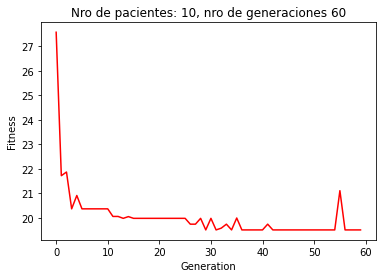

In [ ]:
max_generation = 60
best: list[int] = []
generation_number = 0
SELECTION_SIZE = 10
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.1

population = copy.copy(initial_population)
while generation_number < max_generation:
    generation_number += 1
    # evaluacion de la aptitud de la población inicial (n individuos)
    population_fitness = [fitness(ind) for ind in population]
    # seleccion de los padres (para la reproducción)
    parents = linear_ranking_selection(SELECTION_SIZE, 1.5, population, population_fitness)
    # operadores de variación
    offspring: list[int] = []
    # crossover
    for p1, p2 in zip(parents[0::2], parents[1::2]):
        if (childs := my_crossover(CROSSOVER_PROBABILITY, p1, p2)) != None:
            offspring += childs
    # mutation
    for ind in parents:
        if (mutant := swap_mutation(MUTATION_PROBABILITY, ind)) != None:
            offspring.append(mutant)
    # evaluacion de la aptitud de los λ descendientes
    offspring_fitness = [fitness(ind) for ind in offspring]

    prev_fitness = copy.deepcopy(population_fitness)
    # λ individuos aptos + n padres
    population += offspring
    population_fitness += offspring_fitness
    # seleccionamos un individuo para la grafica
    best.append(population[random.randint(0, len(population) - 1)])
    # selección del ambiente n
    population = linear_ranking_selection(SELECTION_SIZE, 1.5, population, population_fitness)

    # impresión de la generación
    if generation_number % int(max_generation / 10) == 0:
        print(f"Generación: {generation_number}, número de descendientes: {len(offspring)}")

plt.plot([fitness(x) for x in best], "r-")
plt.title(f"Nro de pacientes: {N_pacientes}, nro de generaciones {max_generation}")
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.show()


In [ ]:
def tiempo_espera_paciente(individual: list[int]):
    t_atencion = tiempo_atencion[[individual], 1][0]
    tiempo_espera = t_atencion[:-1].cumsum()
    tiempo_espera = np.insert(tiempo_espera, 0, 0)
    return tiempo_espera

In [ ]:
solution = min(best, key=lambda x: fitness(x))
print(f"""Posición de los pacientes\n{tiempo_atencion[solution, :]}\n
Tiempo de espera de cada paciente\n{tiempo_espera_paciente(solution)}\n
Tiempo de espera total mínimo:\n(x*) = {fitness(solution)}""")


Posición de los pacientes
[[4.         0.19098842]
 [7.         0.22700625]
 [9.         0.30718424]
 [1.         0.54182493]
 [8.         0.55887844]
 [2.         0.79695504]
 [3.         0.71399197]
 [0.         0.79158751]
 [6.         0.86234296]
 [5.         0.90608438]]

Tiempo de espera de cada paciente
[0.         0.19098842 0.41799467 0.72517892 1.26700384 1.82588228
 2.62283732 3.33682929 4.1284168  4.99075976]

Tiempo de espera total mínimo:
(x*) = 19.505891308944367
